CLC Circuit
------------------------------------------------------------------------------------------------------------------------


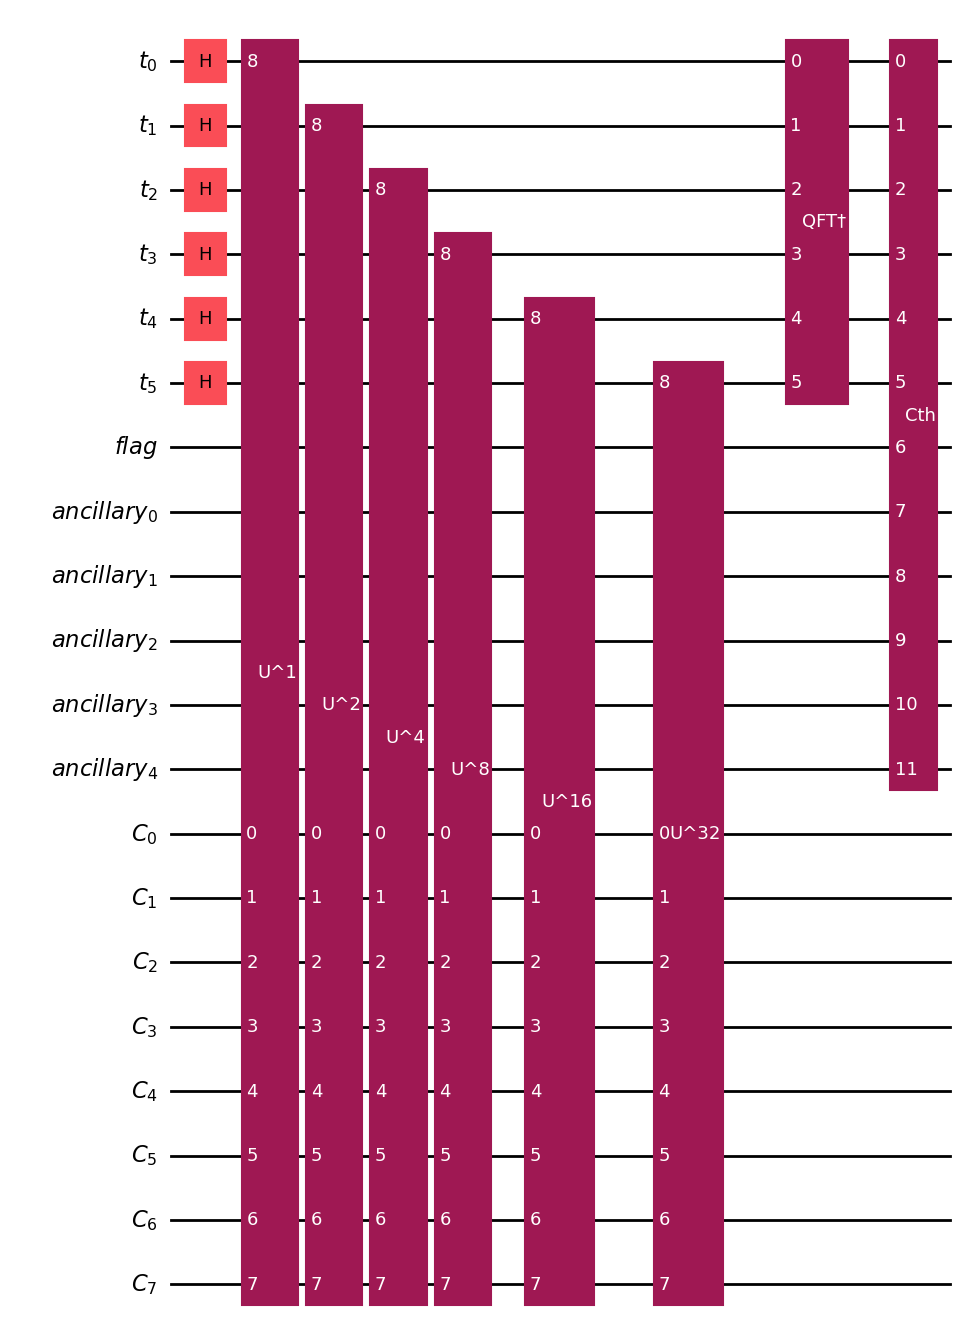


Final statevector which has cost less than threshold:
000010 |00100100
000011 |00100110
000011 |00101100
000011 |01000100
000001 |01100100
000011 |01100101
000010 |01100110
000011 |01101000
000010 |01101100
000011 |01101110
000011 |01110100
000010 |11000100
000011 |11000110
000011 |11001100
000000 |11100100
000010 |11100101
000001 |11100110
000010 |11101000
000011 |11101010
000001 |11101100
000011 |11101101
000010 |11101110
000010 |11110100
000011 |11110110
000011 |11111100


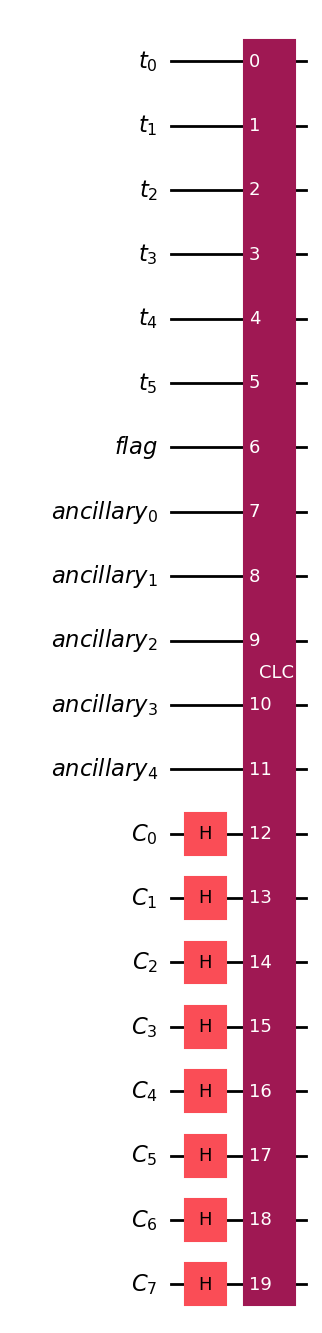

In [1]:
import warnings
warnings.filterwarnings("ignore")

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import QFT, IntegerComparator
from qiskit.quantum_info import Statevector
from U_Power import build_U_power_oracle 
import numpy as np
from numpy import pi
from CLC import create_clc_oracle

# --- Parameters ---
t = 6  # number of precision qubits
threshold = 4  # threshold in phase units (0–63 since t=6)

theta_matrix = np.array([
    [0, pi/16, pi/32, pi/8],  # distances from city 0
    [pi/8, 0, pi/16, pi/32],  # distances from city 1
    [pi/16, pi/8, 0, pi/16],  # distances from city 2
    [pi/16, pi/32, pi/8, 0]   # distances from city 3
])


# --- Quantum Registers ---
precision = QuantumRegister(t, 't')        # Phase estimation qubits
flag = QuantumRegister(1, 'flag')          # Marking solutions which are under the threshold
ancillary = QuantumRegister(5, 'ancillary')
cycle = QuantumRegister(8, 'C')            # Cycle qubits

circuit = QuantumCircuit(precision, flag, ancillary, cycle)

for i in range(8):
    circuit.h(cycle[i])  # superposition over tours

clc = create_clc_oracle(theta_matrix, t, threshold)
circuit.append(clc,[*precision, *flag, *ancillary, *cycle])

backend = Aer.get_backend('statevector_simulator')
compiled = transpile(circuit, backend)
result = backend.run(compiled).result()
state = result.get_statevector()

total_qubits = t + 1 + 5 + 8

print("\nFinal statevector which has cost less than threshold:")
for i,amp in enumerate(state):
    if abs(amp) > 1e-6:
        bin_str = format(i, f'0{20}b')
        t_bits   = bin_str[14:20][::-1]
        flag_bit = bin_str[13]
        ancillary_flag_bits = bin_str[8:13]
        cycle_bits = bin_str[0:8]
        if flag_bit == "1":
            print(f"{t_bits} |{cycle_bits}")
        
circuit.draw('mpl')

